# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [2]:

# Import libraries
import numpy as np
import pandas as pd

# For plotting
%matplotlib inline
import matplotlib.pyplot as plt 

print "Imports complete"

Imports complete


In [3]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 30
Graduation rate of the class: 67.09%


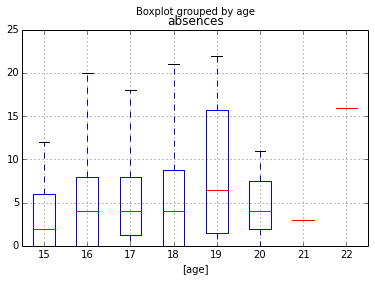

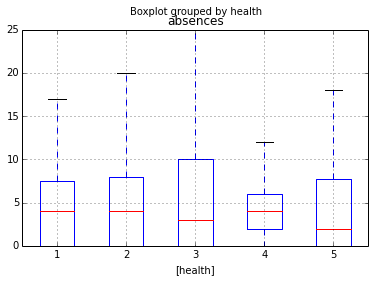

In [4]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_students = student_data.count(axis=0)[0]
n_features = student_data.count(axis=1)[0] - 1 #Target removed
n_passed = sum(student_data.passed=="yes")
n_failed = sum(student_data.passed=="no")
grad_rate = float(n_passed)/float(n_passed+n_failed)
print "Total number of students: {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Number of features: {}".format(n_features)
print "Graduation rate of the class: {:.2f}%".format(grad_rate*100)

# Box plotting data
data=student_data[['age','absences']]
data.boxplot(by='age', sym='')

data=student_data[['health','absences']]
data.boxplot(by='health', sym='')

## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [5]:
# Extract feature (X) and target (y) columns
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print "Feature column(s):-\n{}".format(feature_cols)
print "Target column: {}".format(target_col)

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels
print "\nFeature values:-"
print X_all.head()  # print the first 5 rows

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: passed

Feature values:-
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

     ...    higher internet  romantic  famrel  freetime goout Dalc Walc  \
0    ...       yes       no        no       4         3     4    1    1   
1    ...       yes     

### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [6]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
print "Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns))

#Transforming the string targets to numeric 
y_all = ((y_all=="yes")*1)


Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [7]:
# sklear used to split data to 76/24 sets (This was done to get 300 samples in the training set)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.24, random_state=123)

print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])

print "Done with data split !"

Training set: 300 samples
Test set: 95 samples
Done with data split !


## 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What is the theoretical O(n) time & space complexity in terms of input size?
- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

In [8]:
# Train a model
import time

def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.10f}".format(end - start)


In [9]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score
import time

def train_classifier(clf, X_train, y_train):
    #print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Training time (secs): {:.10f}".format(end - start)

def train_predict(clf, X_train, y_train, X_test, y_test):
    print "------------------------------------------"
    print "Training set size: {}".format(len(X_train))
    train_classifier(clf, X_train, y_train)
    print "F1 score for training set: {}".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))

def predict_labels(clf, features, target):
    #print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print "Prediction time (secs): {:.10f}".format(end - start)
    return f1_score(target, y_pred, pos_label=1)

print "Let's train"



Let's train


In [14]:
#Training 3 different models with three different datasets

# TODO: Choose a model, import it and instantiate an object
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()

print "\nTesting Decision Tree with 100"
train_predict(clf1, X_train[:100], y_train[:100], X_test, y_test)
print "\nTesting Decision Tree with 200"
train_predict(clf1, X_train[:200], y_train[:200], X_test, y_test)
print "\nTesting Decision Tree with 300"
train_predict(clf1, X_train[:300], y_train[:300], X_test, y_test)

from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()

print "\nTesting Random Forests with 100"
train_predict(clf2, X_train[:100], y_train[:100], X_test, y_test)
print "\nTesting Random Forests with 200"
train_predict(clf2, X_train[:200], y_train[:200], X_test, y_test)
print "\nTesting Random Forests with 300"
train_predict(clf2, X_train[:300], y_train[:300], X_test, y_test)

from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()

print "\nTesting Naive Bayes with 100"
train_predict(clf3, X_train[:100], y_train[:100], X_test, y_test)
print "\nTesting Naive Bayes with 200"
train_predict(clf3, X_train[:200], y_train[:200], X_test, y_test)
print "\nTesting Naive Bayes with 300"
train_predict(clf3, X_train[:300], y_train[:300], X_test, y_test)

print clf3.get_params(True)

print "\nDone"


Testing Decision Tree with 100
------------------------------------------
Training set size: 100
Training time (secs): 0.0009999275
Prediction time (secs): 0.0000000000
F1 score for training set: 1.0
Prediction time (secs): 0.0010001659
F1 score for test set: 0.721804511278

Testing Decision Tree with 200
------------------------------------------
Training set size: 200
Training time (secs): 0.0020000935
Prediction time (secs): 0.0000000000
F1 score for training set: 1.0
Prediction time (secs): 0.0000000000
F1 score for test set: 0.780141843972

Testing Decision Tree with 300
------------------------------------------
Training set size: 300
Training time (secs): 0.0040001869
Prediction time (secs): 0.0009999275
F1 score for training set: 1.0
Prediction time (secs): 0.0000000000
F1 score for test set: 0.779411764706

Testing Random Forests with 100
------------------------------------------
Training set size: 100
Training time (secs): 0.0290000439
Prediction time (secs): 0.0009999275
F

## 5. Choosing the Best Model

- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?
- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
- What is the model's final F<sub>1</sub> score?

In [27]:
# TODO: Fine-tune your model and report the best F1 score
from sklearn import grid_search

clf = GaussianNB()

#No parameters to tune for GaussianNB, but cross validation still done
parameters = {}

final_clf = grid_search.GridSearchCV(clf, parameters, cv=10, verbose=1, scoring = 'f1')

print final_clf.fit(X_train, y_train)
    
# Printing the best model form the grid search
print(final_clf.best_estimator_)

print "F1 score for training set: {}".format(predict_labels(final_clf.best_estimator_, X_train, y_train))
print "F1 score for test set: {}".format(predict_labels(final_clf, X_test, y_test))

from sklearn.metrics import confusion_matrix
final_model = final_clf.best_estimator_

print "/n Confusion matrix with all of the data"
print confusion_matrix(y_all, final_model.predict(X_all))

print("Done")


Fitting 10 folds for each of 1 candidates, totalling 10 fits
GridSearchCV(cv=10, error_score='raise', estimator=GaussianNB(),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=1)
GaussianNB()
Prediction time (secs): 0.0000000000
F1 score for training set: 0.766584766585
Prediction time (secs): 0.0000000000
F1 score for test set: 0.828571428571
/n Confusion matrix with all of the data
[[ 62  68]
 [ 51 214]]
Done


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
